In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('/content/Historical_Wildfires.csv')

In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [9]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

###understand the change in average estimated fire area over time using pandas to plot the line chart.

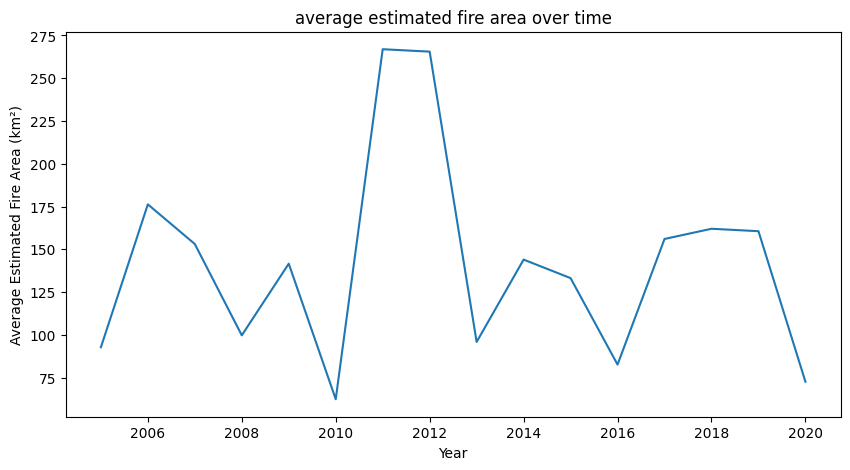

In [58]:
#understand the change in average estimated fire area over time using pandas to plot the line chart.
plt.figure(figsize=(10, 5))
df_fa=df.groupby('Year')['Estimated_fire_area'].mean()
df_fa.plot()
plt.title('average estimated fire area over time')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

###Plot the estimated fire area over month between (2010:2013) as this is most years in fires


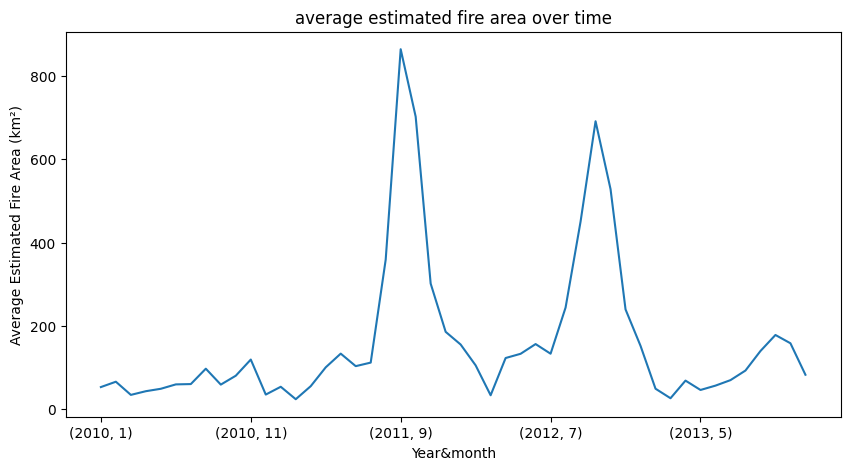

In [59]:
plt.figure(figsize=(10, 5))
df2 = df[(df['Year']>=2010) & (df['Year']<=2013)]
df_fa_m = df2.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_fa_m.plot()
plt.title('average estimated fire area over time')
plt.xlabel('Year&month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

###develop a barplot to find the insights on the distribution of mean estimated fire brightness across the regions

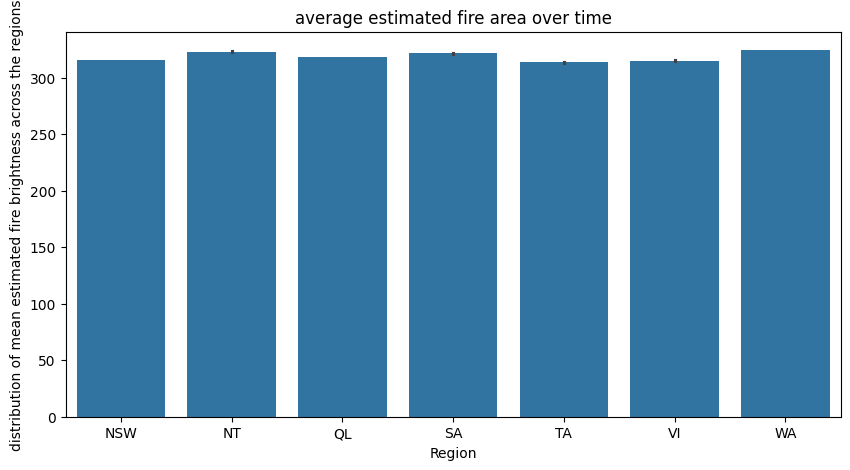

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x = 'Region', y='Mean_estimated_fire_brightness')
plt.title('average estimated fire area over time')
plt.xlabel('Region')
plt.ylabel('distribution of mean estimated fire brightness across the regions')
plt.show()

### Develop a pie chart and find the portion of count of pixels for presumed vegetation fires vary across regions

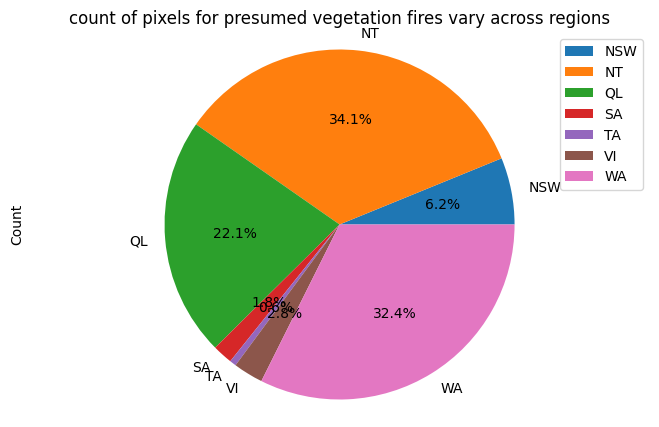

In [55]:
plt.figure(figsize=(8, 5))
df_pie = df.groupby('Region').sum('Count')
df_pie['Count'].plot(kind = 'pie',
                            autopct = '%1.1f%%',
                            #labels=None,
                            #colors=color_list
                            )
plt.title('count of pixels for presumed vegetation fires vary across regions')
plt.axis('equal')
plt.legend(labels=df_pie.index, loc='upper right')

### histogram of the mean estimated fire brightness

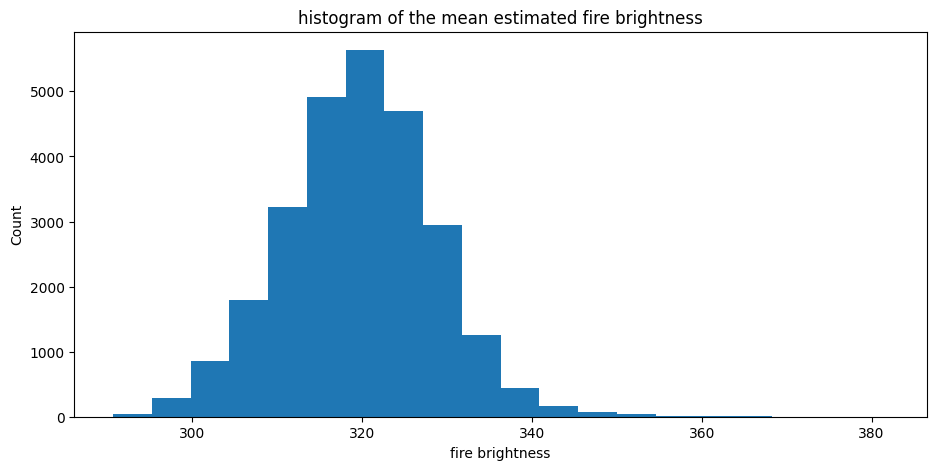

In [62]:
#Using Matplot
plt.figure(figsize=(11, 5))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.title('histogram of the mean estimated fire brightness')
plt.xlabel('fire brightness')
plt.ylabel('Count')
plt.show()

### distribution of estimated fire brightness across regions by hue

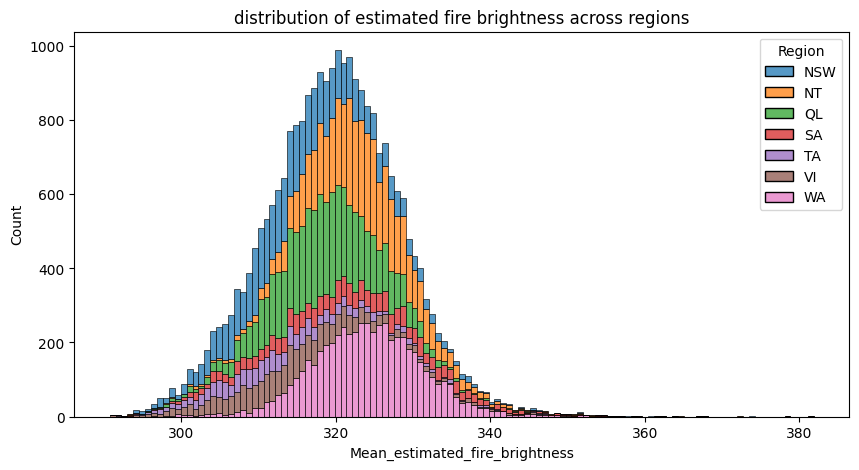

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(data = df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.title('distribution of estimated fire brightness across regions')
plt.show()

### Develop a scatter plot to find the correlation between mean estimated fire radiative power and mean confidence level

Text(0.5, 1.0, 'Mean Estimated Fire Radiative Power vs. Mean Confidence')

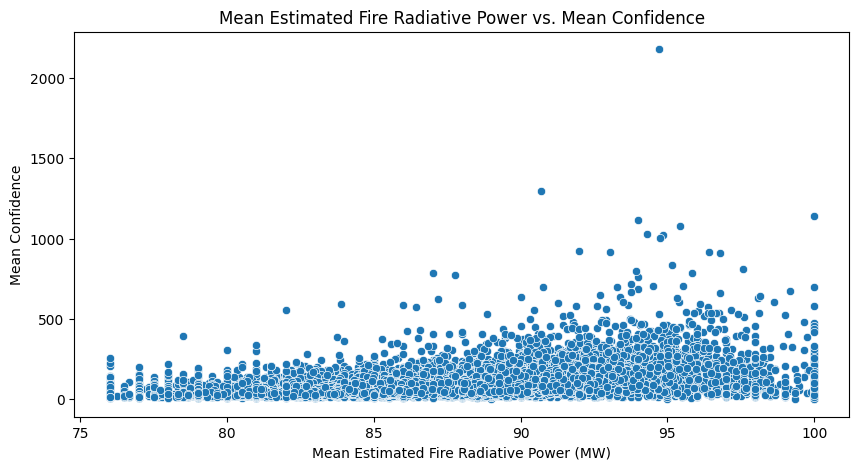

In [70]:
plt.figure(figsize=(10, 5))
sns.scatterplot( y='Mean_estimated_fire_radiative_power', x ='Mean_confidence', data = df)
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')